In [51]:
from preparing_script import agrofiz_plot, SVD_vis, Kvu, ob_ves_plot
import pandas as pd 
import numpy as np 
import scipy 
from scipy.stats import f_oneway as ANOVA

import seaborn as sns 
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
agrofiz = pd.read_csv("полевые данные общая/ready_data/агрофизика.csv")


In [4]:
agrofiz.columns

Index(['Год', 'GPS №', 'Тип обработки', 'повторность',
       'Содержание 0.25–10 мм, %', 'Содержание >10, %', 'Содержание <0.25, %',
       'Коэф. структурности', 'СВД, мм', 'Коэф. АФИ',
       'Содержание 0.25–10 мм(водоустойчивые), % ',
       'СВД водоустойчивые 10-7, мм', 'СВД водоустойчивые 5-3, мм',
       'СВД водоустойчивые 7-5, мм', 'СВД водоустойчивые >10, мм',
       'Кву 10-7, мм', 'Кву 5-3, мм', 'Кву 7-5, мм', 'Кву >10, мм'],
      dtype='object')

### Коэф структурности

F_onewayResult(statistic=2.699235426855616, pvalue=0.12435136888196806)

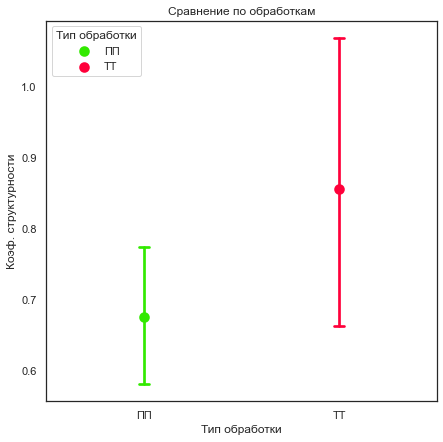

In [12]:
stats, aov, fig = agrofiz_plot(agrofiz, 'Коэф. структурности')
aov


In [19]:
stats

СВД, мм                    
                   std variation      mean
Тип обработки                             
ПП             0.43421  0.044956  9.106176
ТТ             0.90335  0.102275  8.063008

### СВД воздушно сухие

F_onewayResult(statistic=9.112920088700115, pvalue=0.009876030322910474)

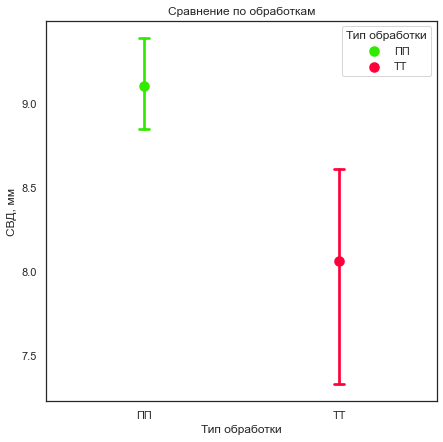

In [21]:
stats, aov, fig = agrofiz_plot(agrofiz, 'СВД, мм')
aov


In [23]:
stats

СВД, мм                    
                   std variation      mean
Тип обработки                             
ПП             0.43421  0.044956  9.106176
ТТ             0.90335  0.102275  8.063008

### СВД водоустойчивые 

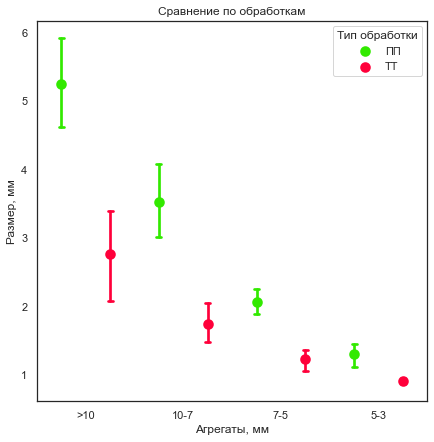

,агрегаты,P-val
0,"СВД водоустойчивые >10, мм",0.000650
1,"СВД водоустойчивые 10-7, мм",0.000408
2,"СВД водоустойчивые 7-5, мм",0.000067
3,"СВД водоустойчивые 5-3, мм",0.006358


In [44]:
stats, aov, fig = SVD_vis(agrofiz)
aov

In [45]:
stats

СВД водоустойчивые >10, мм                     \
                                     std variation     mean   
Тип обработки                                                 
ПП                              1.108882  0.199199  5.24834   
ТТ                              0.978510  0.323818  2.75850   

              СВД водоустойчивые 10-7, мм                      \
                                      std variation      mean   
Тип обработки                                                   
ПП                               0.862926  0.231007  3.521854   
ТТ                               0.375665  0.196553  1.744740   

              СВД водоустойчивые 7-5, мм                      \
                                     std variation      mean   
Тип обработки                                                  
ПП                              0.306476  0.139487  2.071514   
ТТ                              0.223905  0.166213  1.229729   

              СВД водоустойчивые 5-3, мм                      
                                     std variation      mean  
Тип обработки                                                 
ПП                              0.288405  0.209349  1.298840  
ТТ                              0.057123  0.057500  0.906875

### Кву

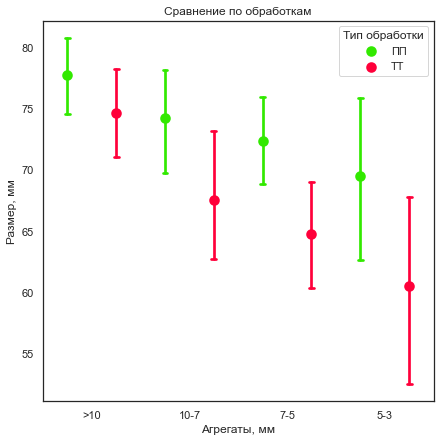

,агрегаты,P-val
0,"Кву >10, мм",0.266167
1,"Кву 10-7, мм",0.102644
2,"Кву 7-5, мм",0.027805
3,"Кву 5-3, мм",0.135488


In [55]:
stats, aov, fig = Kvu(agrofiz)
aov

In [56]:
stats

Кву >10, мм                      Кву 10-7, мм            \
                      std variation       mean          std variation   
Тип обработки                                                           
ПП               5.186702  0.062881  77.766667     7.264989  0.092277   
ТТ               4.966429  0.060740  74.641667     7.090252  0.095794   

                         Кву 7-5, мм                      Кву 5-3, мм  \
                    mean         std variation       mean         std   
Тип обработки                                                           
ПП             74.227778    5.846069  0.076135  72.394444   10.636526   
ТТ             67.566667    5.842146  0.082344  64.766667   10.917757   

                                    
              variation       mean  
Тип обработки                       
ПП             0.144245  69.522222  
ТТ             0.164713  60.508333

# Объемный вес 

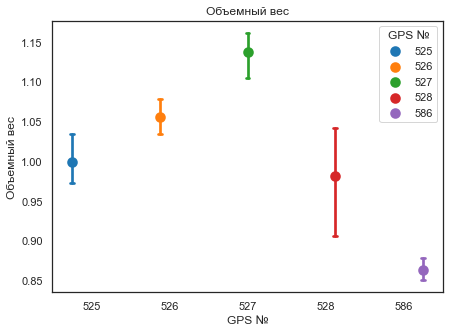

F_onewayResult(statistic=21.9003672745783, pvalue=4.040834976929632e-06)

In [76]:
ob_ves = pd.read_csv('полевые данные общая/ready_data/объемный вес.csv')


stats, aov, fig = ob_ves_plot(ob_ves)
aov

In [77]:
stats

Объемный вес                    
               std variation      mean
GPS №                                 
525       0.036136  0.031324  0.999057
526       0.027059  0.022194  1.055830
527       0.031954  0.024339  1.136974
528       0.077045  0.067960  0.981792
586       0.017064  0.017122  0.863131